<a href="https://colab.research.google.com/github/KeremAydin98/machine-learning-with-python-projects/blob/main/cat_and_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task:
For this challenge, you will use TensorFlow 2.0 and Keras to create a convolutional neural network that correctly classifies images of cats and dogs with at least 63% accuracy.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

In [ ]:
IMG_SIZE = (150, 150)

Epochs = 10

batch_size = 128

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True) 

validation_datagen = ImageDataGenerator(rescale=1./255) 

In [ ]:
train_data = train_datagen.flow_from_directory(directory = train_dir, 
                                                           batch_size = batch_size,
                                                           shuffle = True,
                                                           target_size = IMG_SIZE,
                                                           class_mode = 'binary')

validation_data = validation_datagen.flow_from_directory(directory = validation_dir,
                                                         batch_size = batch_size,
                                                         shuffle = False,
                                                         target_size = IMG_SIZE,
                                                         class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3),padding = 'valid',input_shape = (150, 150, 3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3),padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3),padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())


model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'BinaryCrossentropy',metrics = ['accuracy'])

history = model.fit(train_data, validation_data = validation_data, epochs = Epochs)

Epoch 1/10
16/16 [==============================] - 25s 1s/step - loss: 1.1507 - accuracy: 0.4980 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 2/10
16/16 [==============================] - 20s 1s/step - loss: 0.6946 - accuracy: 0.5115 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 3/10
16/16 [==============================] - 20s 1s/step - loss: 0.6932 - accuracy: 0.5060 - val_loss: 0.6928 - val_accuracy: 0.5030
Epoch 4/10
16/16 [==============================] - 20s 1s/step - loss: 0.6923 - accuracy: 0.5345 - val_loss: 0.6921 - val_accuracy: 0.5290
Epoch 5/10
16/16 [==============================] - 20s 1s/step - loss: 0.6824 - accuracy: 0.5670 - val_loss: 0.6818 - val_accuracy: 0.5500
Epoch 6/10
16/16 [==============================] - 19s 1s/step - loss: 0.6601 - accuracy: 0.6230 - val_loss: 0.6721 - val_accuracy: 0.5840
Epoch 7/10
16/16 [==============================] - 19s 1s/step - loss: 0.6512 - accuracy: 0.6420 - val_loss: 0.6563 - val_accuracy: 0.6100
Epoch 8/10
16/16 [==

In [ ]:
from PIL import Image
image_list = []

valid_images = ['.jpg','.png']
for filename in os.listdir(test_dir): 

    ext = os.path.splitext(filename)[1]
    if ext.lower() not in valid_images:
        continue
    
    im=Image.open(os.path.join(test_dir,filename))
    im = im.resize(IMG_SIZE)
    image_list.append(im)




In [ ]:
len(image_list)

50

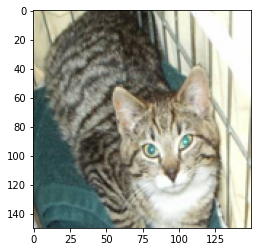

In [ ]:
img = np.array(image_list[0])
plt.imshow(img)

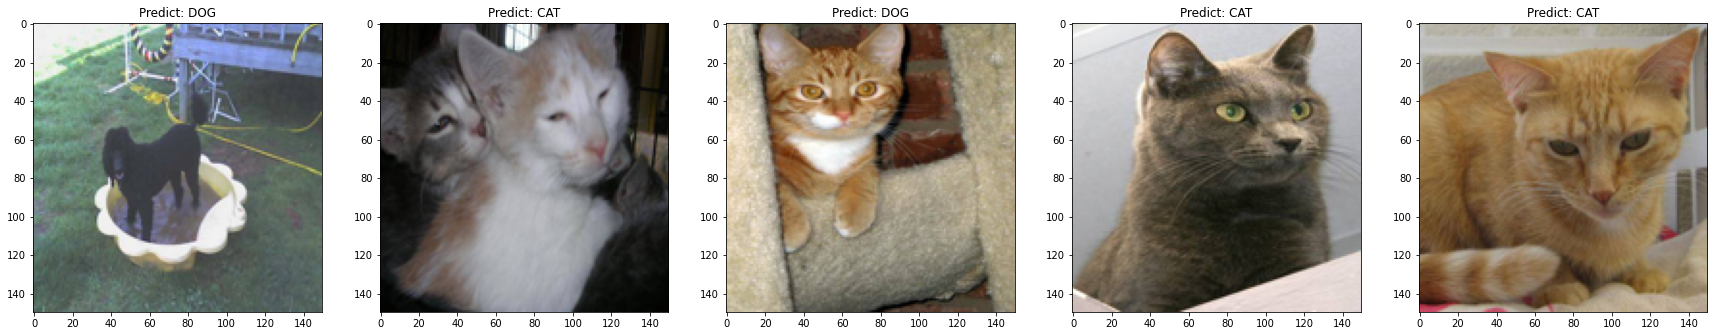

In [ ]:
classes = ['CAT', 'DOG']

figure,ax=plt.subplots(1,5,figsize=(30,30))

for i in range(5):

  random_value=np.random.randint(low=0,high=50)

  numpy_image = np.array(image_list[random_value])

  img = numpy_image.reshape((1,150,150,3))

  prediction = model.predict(img)

  ax[i].imshow(numpy_image)	
  ax[i].set_title("Predict: %s" % classes[int(prediction)])


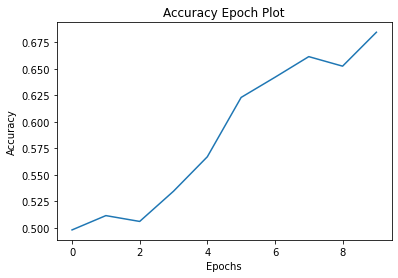

In [ ]:
plt.plot(range(Epochs),history.history['accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Epoch Plot")
plt.show()
